# The numpy.random package
***

## Overview of the package
***

## "Simple random data" and "Permutations" functions
***

### Simple random data

#### Integers

> Generator.integers(*low, high=None, size=None, dtype=np.int64, endpoint=False*)

The **integers()** function generates a sequence of random integers. The function takes one required argument, **low**, which defines the upper limit of values which may be returned. If an argument is also passed for the **high** parameter, the argument passed for **low** becomes the lower limit of values which may be returned, and **high** becomes the upper limit.

In [8]:
import numpy
import numpy.random as np

rng = np.default_rng()
rng.integers(5) # 5 is passed as the "low" argument
                # all outputs will be between 0 (inclusive) and 5 (exclusive)

4

In [20]:
rng.integers(5, 10) # 5 is the "low" argument, 10 as the "high" argument;
                    # outputs will be between 5 (inclusive) and 10 (exclusive)

8

The **integers()** function returns one integer value, unless an argument is passed for the **size** parameter, in which case a sequence of values of size equal to the value of the argument is returned.

In [6]:
rng.integers(5, size=10) # this will return 10 values between 0 and 5 (exclusive)

array([1, 0, 1, 1, 3, 3, 0, 0, 2, 1], dtype=int64)

A tuple (an unchangeable list of items) can be passed to the **size** parameter if the returned values should be in a multi-dimensional instead of one-dimensional array. The first value of the tuple defines the number of rows in the returned ndarray, and the second value defines the number of columns.

In [60]:
rng.integers(10, size=(3, 4)) # generates integers of values below 10; 3 rows, 4 columns

array([[6, 4, 8, 9],
       [2, 9, 9, 3],
       [5, 7, 4, 8]], dtype=int64)

The dtype of the result can defined with the **dtype** parameter. The results can be confirmed by passing the **integers()** function inside the **type()** from the standard library.

In [9]:
print(rng.integers(10, dtype=numpy.uint8))
type(rng.integers(10, dtype=numpy.uint8))

6


numpy.uint8

The **endpoint** parameter can be passed a Boolean ***True*** or ***False*** value to change the functioning of the **low** and **high** parameters. If **endpoint** is set to ***True***, the value of **high** will be inclusive, so integers of that value can be returned. By default **endpoint** is set to ***False***, so the value of **high** is exclusive, meaning integers of that value cannot be returned (only integers of one increment lower, at maximum). The latter case is called a half-open interval.

In [20]:
rng.integers((1, 2), endpoint=True)

array([0, 2], dtype=int64)

***

#### Random

>  Generator.random(*size=None, dtype=np.float64, out=None*)

The **random()** function returns float values from the interval 0.0 – 1.0. If no arguments are passed to the function's parameters, it will return a single float value.

In [21]:
rng.random()

0.8073554994295814

The **size** parameter is used, as in the **integers()** function, to define the number of values returned, and can take an integer or tuple value as argument. The **dtype** parameter is also used the same as in the **integers()** function, but only *float64* and *float32* are supported.

In [24]:
rng.random(10)

array([0.12982079, 0.51023399, 0.35447712, 0.7614928 , 0.3623529 ,
       0.49695906, 0.45014179, 0.23657541, 0.38061748, 0.71875604])

In [35]:
rng.random(10, dtype="float32")

array([0.95380855, 0.7652706 , 0.91428745, 0.6791067 , 0.7631116 ,
       0.51802695, 0.9997592 , 0.5678816 , 0.07534087, 0.65552557],
      dtype=float32)

The **out** parameter takes a multi-dimensional array to define the shape of the output.

In [6]:
rng.random()

0.8628710547866498

***

#### Choice
> Generator.choice(*a, size=None, replace=True, p=None, axis=0, shuffle=True*)

The ***choice()*** function returns a random sample from a one-dimensional array passed as an argument.

The ***a*** parameter is required, and takes an integer or array as its argument. If an integer is passed, the function runs ***np.arange(x)*** to generate the random value; if an array is passed, the return value is randomly selected from its elements.

In [7]:
choices = rng.integers(10, size=10) # generating a 1d array
print(choices) # printing the array
rng.choice(choices) # choice() selects one element from the array

[5 9 7 6 2 7 2 4 3 0]


3

The ***size*** parameter again defines the output shape. If an integer is passed, the returned array will be of size equal to the value of that integer; if a tuple is passed, the values of the tuple will define the rows and columns of the returned multi-dimensional array.

In [15]:
rng.choice(choices, size=(2,7))

array([[4, 7, 7, 9, 2, 9, 2],
       [9, 0, 0, 2, 2, 6, 0]], dtype=int64)

The ***p*** parameter take a one-dimensional array of float values between 0.0 and 1.0, with the same number of elements as the array passed for the ***a*** parameter, and uses the float values to set the probability of each corresponding value in the ***a*** array being returned. The sum of the elements of ***p*** must total 1.0.

In the example below, the element of ***a*** in the second index position has an assigned probability of 0.3, and so it appears more frequently in the output arrays.

In [24]:
rng.choice(choices, size=(2,10), p=(0.1, 0.3, 0.05, 0.1, 0.1, 0.05, 0.1, 0.025, 0.075, 0.1))

array([[6, 9, 9, 9, 9, 9, 6, 5, 2, 0],
       [9, 9, 5, 5, 3, 2, 9, 2, 9, 9]], dtype=int64)

The ***axis*** parameter defines the axis along which the selection is performed, either along rows (0) or columns (1).

In [46]:
tupleChoice = ([1, 2, 3], [4, 5, 6], [7, 8, 9]) # declaring a tuple to pass to the "a" parameter
rng.choice(tupleChoice, axis=0) # passing the tuple to choice(), setting the axis to rows
                                # the first array is returned

array([1, 2, 3])

In [47]:
rng.choice(tupleChoice, axis=1) # setting the axis to columns
                                # the first element of each array is returned

array([1, 4, 7])

The ***shuffle*** parameter takes a Boolean value and determines whether the sample is shuffled  when sampling without replacement.

In [59]:
rng.choice(choices, size=10, shuffle=True)

array([7, 5, 7, 9, 6, 3, 7, 5, 3, 2], dtype=int64)

***

#### Bytes
> Generator.bytes(*length*)

The ***bytes()*** function returns a string of random bytes. It takes an integer as argument to define the length of the returned string.

In [5]:
rng.bytes(20)

b'\xa7\xb7\xd2\xb9p\xa3\x03\xb2\xa4\x0e\x95\x17[\x86M\xed\xc5\xef4\x99'

***

### Permutations

#### Shuffle

> Generator.shuffle(*x, axis=0*)

The ***shuffle()*** function randomises a sequence of elements by shuffling their positions. The function requires an array or list object to be passed as an argument. There is no return parameter for the function, as the array or list itself is modified so that its elements are permanently reordered. An integer can also be passed as an optional argument to define the axis along which the array is shuffled.

In [22]:
shuffleArray = rng.integers(21, size=15) # generating an array
shuffleArray

array([ 4, 15, 17,  2, 18,  6,  5,  8,  0,  6, 14,  9,  4, 17, 13],
      dtype=int64)

In [77]:
rng.shuffle(shuffleArray) # shuffling the array
shuffleArray # testing if the original array is modified

array([ 4,  9,  5,  3, 10, 19,  7,  2, 15,  2,  5,  1, 14, 16,  2],
      dtype=int64)

***

#### Permutation

> Generator.permutation(*x*)

The ***permutation()*** function is used to either randomly permute a sequence or generate a permuted range. If the argument passed is an integer, the function will run ***np.arange(x)*** on that integer, permute the generated range of values, and return the generated sequence as an array. If the argument passed is an array, ***permutation()*** makes a copy (which it passes to an ndarray object) and randomly reorders the elements of the array. Unlike ***shuffle()***, ***permutation()*** does not modify the original object.

In [78]:
rng.permutation(21) # passing an integer

array([ 1, 10,  9,  5,  0, 18,  2,  4,  3, 15,  7, 19, 20,  6, 17, 11, 12,
       14, 13,  8, 16])

In [79]:
rng.permutation(shuffleArray) # passing an array

array([ 2,  9, 19,  2, 10,  3, 14,  4, 16,  5,  1,  7, 15,  2,  5],
      dtype=int64)

In [80]:
shuffleArray # testing if the original array is modified

array([ 4,  9,  5,  3, 10, 19,  7,  2, 15,  2,  5,  1, 14, 16,  2],
      dtype=int64)

***

## Distribution functions
***

### Normal distribution

> Generator.normal(*loc=0.0, scale=1.0, size=None*)

A normal or Gaussian distribution is one in which values are distributed in a bell-shaped curve, with most points clustering around a central mean value (which forms the highest pointo n the *y* axis) and with a roughly symmetrical distribution of higher and lower values. Examples of this distribution occur frequently in nature, as random distributions of data from independent sources tend toward a normal form as the sample size increases. An example of this is height: most adults in a given population measure roughly the same mean height, with diminishing numbers of people recording higher and lower values (i.e., equally few people will be unusually tall or short compared to the mean).

Because the normal distribution emerges as a property of random data sets, it is useful to data scientists in hypothesis testing. As Francis Morales outlines in [this article](https://medium.com/analytics-vidhya/the-normal-distribution-for-data-scientists-6de041a01cb9), the known properties of the normal distribution, such as the number of standard deviations within which certain percentages of data points should fall, help to identify outliers in the data. This can help to highlight distortions in the gathered data which can then be controlled for.

The ***normal()*** function is used to draw random samples from a normal distribution. It takes two required parameters, both of which are float values: ***loc*** defines the mean value which will correspond to the centre of the ditribution; ***scale*** defines the standard deviation of the distribution, which determines the width or spread of the distribution.

It also takes the ***size*** parameter, which defines the number of values returned. This argument is passed as an int value if the returned values should form a 1-dimensional array, and a tuple value if the they should form a multi-dimensional array.

In [10]:
meanValue = rng.integers(0, 11) # mean value generated as integer
stdDev = rng.random() # standard deviation generated as float
norm = np.default_rng().normal(meanValue, stdDev, 100) # setting the variable containing the normal distribution values
norm

array([ 8.46169816, 10.05965547,  8.86055901,  9.95169568,  8.64502384,
        9.16364807,  9.39646113,  8.45160623,  8.05307196,  7.27571887,
        7.88415944,  9.74813905,  5.52095973, 10.23911927,  8.75405397,
       10.36137621,  7.89484438,  9.4274162 ,  8.74143394,  8.66739173,
        9.15402844,  9.36348958,  8.94906495, 10.32468395,  8.62441738,
        8.72962859,  8.9118539 ,  8.24454158,  9.14920942,  8.37169582,
       10.85352399, 11.45947064,  9.55468858,  8.64057233, 10.19124141,
        9.23624099,  9.97878617,  9.20926708,  9.46189925,  9.8057439 ,
        9.66019409,  9.72518295, 10.8683482 ,  8.18370112,  8.89906426,
       10.22979935,  8.64283494,  9.29506775,  9.1485599 ,  8.79589854,
        8.9800025 ,  8.22430012, 10.93921971,  9.30106022,  9.25615414,
        8.16579808,  8.03554066,  8.03412447,  9.15052396,  9.23659603,
        8.49867069,  7.47746978,  8.9194304 , 10.61600318,  9.93878341,
       10.53932976,  9.38631398, 10.37447763,  7.64854953,  9.24

The numpy documentation gives the following formula to test if the above values form a normal distribution. I will use the randomly generated values in the previous cell to perform the test.

Text(0, 0.5, 'probability')

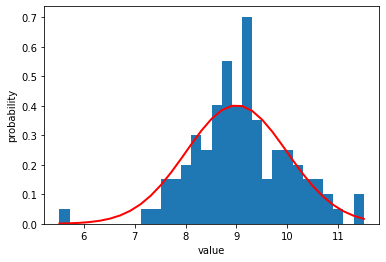

In [11]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(norm, 30, density=True) # defining the histogram
plt.plot(bins, 1/(stdDev * numpy.sqrt(2 * numpy.pi)) * numpy.exp( - (bins - meanValue)**2 / (2 * stdDev**2)), linewidth=2, color='r')
plt.xlabel("value")
plt.ylabel("probability")

The evenness of the distribution and symmetry of the curve can be improved by increasing the sample size:

Text(0, 0.5, 'probability')

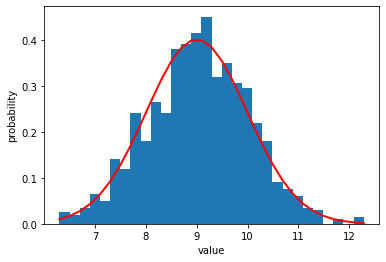

In [12]:
norm = np.default_rng().normal(meanValue, stdDev, 1000)
count, bins, ignored = plt.hist(norm, 30, density=True)
plt.plot(bins, 1/(stdDev * numpy.sqrt(2 * numpy.pi)) * numpy.exp( - (bins - meanValue)**2 / (2 * stdDev**2)), linewidth=2, color='r')
plt.xlabel("value")
plt.ylabel("probability")

***

### Uniform

> Generator.uniform(*low=0.0, high=1.0, size=None*)

The uniform or rectangular distribution describes output values that fall within a pair of known maximum and minimum values. When plotted, the uniform distribution is defined by the plot line being flat, indicating an equal probability for all outcomes. This distribution is important for generating random numbers and testing randomness, as any output number should have the same likelihood of occurrence as any other. If the resulting distribution is not flat, it can indicate that the process for generating randomness is skewed. For example, with a high enough sample size, all the balls in a bingo game should have the same probability of being dispensed. If the outcomes of *n* ball selections is plotted and the mean probability is found not to be uniform, it indicates that factors such as the weight of the balls are distorting the outcomes.

The ***uniform()*** function has one required parameters, ***high***, which takes as argument a float value or array of floats which sets the upper limit of the output interval. It also has the optional parameters ***low***, which sets the lower limit of the interval, and ***size***, which takes an int or tuple of ints to determine the number of values returned.

In [64]:
uniformArray = numpy.sort(rng.random(size=2)) # generating two random values to act as upper and lower bounds
lowerBound, upperBound = uniformArray # assigning the variables
uniformVars = np.default_rng().uniform(lowerBound, upperBound, size=1000) # setting the variable containing the uniform distribution values
uniformVars

array([0.28040538, 0.28524326, 0.18668139, 0.02780936, 0.23703204,
       0.51642298, 0.77921397, 0.29137672, 0.95614339, 0.29315332,
       0.11451161, 0.34339166, 0.91180306, 0.38710315, 0.8002799 ,
       0.60174303, 0.2707452 , 0.87602028, 0.62030211, 0.08620316,
       0.18875092, 0.38133049, 0.98609028, 0.15451421, 0.09698782,
       0.40658047, 0.63096023, 0.19323368, 0.74199163, 0.91703683,
       0.60823484, 0.88542237, 0.86660711, 0.19628615, 0.32127241,
       0.62609387, 0.62738117, 0.73345126, 0.81883977, 0.89295266,
       0.35806801, 0.3918637 , 0.8994829 , 0.09219294, 0.65768462,
       0.1667945 , 0.17876514, 0.50243705, 0.36593099, 0.65644233,
       0.32495237, 0.51435866, 0.10338115, 0.42156934, 0.76381592,
       0.94919884, 0.52041163, 0.87740265, 0.48449881, 0.37785265,
       0.18677311, 0.36647607, 0.63293014, 0.07644101, 0.37970992,
       0.27213018, 0.79017083, 0.30488691, 0.91235533, 0.68658037,
       0.21611725, 0.10776955, 0.43802362, 0.08919673, 0.82068

The numpy documentation gives the following formula to test if the above values form a uniform distribution:

Text(0, 0.5, 'probability')

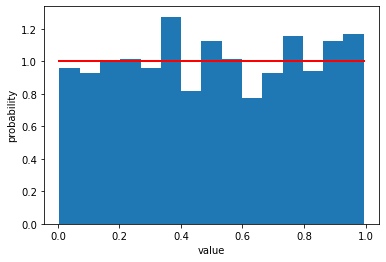

In [69]:
count, bins, ignored = plt.hist(uniformVars, 15, density=True)
plt.plot(bins, numpy.ones_like(bins), linewidth=2, color='r')
plt.xlabel("value")
plt.ylabel("probability")

As we can see, the mean probability for all values is constant, indicating that this is a uniform distribution.

### Poisson



### Binomial



### Multinomial



### Rayleigh



## Seeds
***

A ***seed*** is a piece of information which is supplied to an algorithm to generate pseudorandom data. Because of the deterministic nature of the calculations run by computers, where inputs follow predictable methods to arrive at outputs, computers cannot produce truly random numbers without input from external sources. Some of these sources may include:

* weather data from a live-updating source
* the current time reading from the computer's processor
* processor temperature or fan speed
* user-generated data such as the change of cursor position

The computer takes data from one or a combination of such sources in the form of a long string of numbers, and this data forms the seed. The seed is then passed as input into a generator algorithm to produce pseudorandom data. Because the calculations used to generate the latter data is deterministic, the results are not truly random. However, because the input seed data is unpredictable and unlikely to repeat, the output numbers are an adequate approximation of truly random data. This also means that if the same seed is supplied to the generator algorithm, the exact same output numbers will be produced (hence the data is only “pseudo”-random).

The memory location of the randomly generated seed can be checked by passing the BitGenerator variable:

In [29]:
rng

Generator(PCG64) at 0x2479D717C70

### References